In [2]:
import pandas as pd
import re
import folium
from folium import plugins
from japanmap import pref_names
import matplotlib.pyplot as plt
from japanmap import picture
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

In [3]:
class Corona:
    def __init__(self, csv_name, save_csv_name, title):
        self.data = pd.read_csv(csv_name)
        self.save_csv_name = save_csv_name
        self.title = title + "のコロナ感染者マップ"
    
    def csv(self):
        self.group_data = self.data[['*居住地*','*新No.*']].groupby('*居住地*').count()
        return self.group_data
    
    def csv_clear(self):
        self.data['*居住地*']=self.data["*居住地*"].map(lambda x: re.sub(r"[/*,※]", "", x))
        for i in self.data.index:
            if '中国' in self.data.loc[i, '*居住地*']:
                self.data = self.data.drop(i, axis=0)
            elif '調査中' in self.data.loc[i, '*居住地*']:
                self.data = self.data.drop(i, axis=0)
#         return self.data
    
    def fig_display(self):
        cmap = plt.get_cmap('Reds')
        norm = plt.Normalize(vmin=0, vmax=self.group_data['*新No.*'].max())
        plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
        fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
        plt.imshow(picture(self.group_data['*新No.*'].apply(fcol)));
        plt.title(self.title)
        plt.savefig(self.save_csv_name)
        
    def data_change(self):
        self.data["*新No.*"] = pd.to_numeric(self.data["*新No.*"], errors='coerce')
        return self.data['*新No.*']

In [148]:
name = "korona0227.csv"
save_csv_name = "corona0227"
title = "02/27木曜日"
corona = Corona(name, save_csv_name, title)

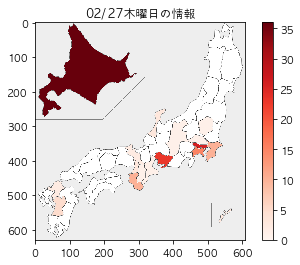

In [149]:
corona.csv_clear()
corona.csv()
corona.fig_display()

In [132]:
name = "korona0226.csv"
save_csv_name = "corona0226.png"
corona = Corona(name, save_csv_name)

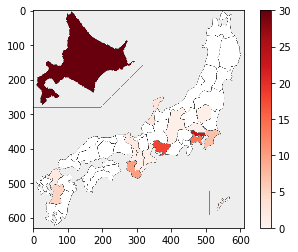

In [133]:
corona.csv_clear()
corona.csv()
corona.fig_display()

In [134]:
name = "korona0225.csv"
save_csv_name = "corona0225.png"
corona = Corona(name, save_csv_name)

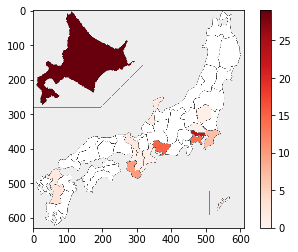

In [135]:
corona.csv_clear()
corona.csv()
corona.fig_display()

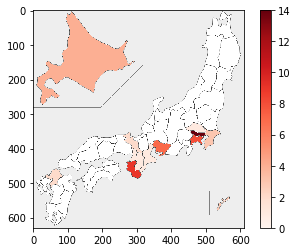

In [139]:
name = "japanease.csv"
save_csv_name = "corona0221.png"
corona = Corona(name, save_csv_name)
corona.csv_clear()
corona.csv()
corona.fig_display()

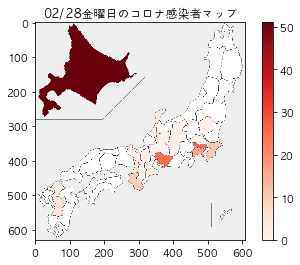

In [4]:
name = "korona0228.csv"
save_csv_name = "corona0228"
title = "02/28金曜日"
corona = Corona(name, save_csv_name, title)
corona.csv_clear()
corona.csv()
corona.fig_display()

In [5]:
corona.csv()

,*新No.*
*居住地*,
三重県,1
京都府,2
北海道,51
千葉県,11
和歌山,1
和歌山県,10
埼玉県,1
大阪府,5
奈良県,1
